# Imports

In [23]:
import pandas                 as pd
import numpy                  as np
# import plotly.express         as px
import seaborn                as sns
import matplotlib.pyplot      as plt

from IPython.core.display     import HTML
from IPython.display          import Image


## Help Functions

In [24]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    # sns.set()
    
    
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


# Load and Summary Data

In [25]:
url =  'https://datasetsbigdata.s3-sa-east-1.amazonaws.com/ChurnTelecom.csv'
df  = pd.read_csv(url)

In [26]:
df.shape

(3333, 21)

In [27]:
df.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [28]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

# EDA

In [29]:
# Group telco by 'Churn' and compute the mean

print(df.groupby(['Churn']).mean())
print(df.groupby(['Churn']).std())

#  conclusion :

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge   Area_Code
Churn                                                                                                                                                                                                              
no         100.793684       8.604561  175.175754  199.043298  200.133193  10.158877        1.449825  100.283158   29.780421  100.038596   16.918909   100.058246      9.006074    4.532982     2.743404  437.074737
yes        102.664596       5.115942  206.914079  212.410145  205.231677  10.700000        2.229814  101.335404   35.175921  100.561077   18.054969   100.399586      9.235528    4.163561     2.889545  437.817805
       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  Eve_Charge  Night_C

In [30]:
# Count the number of churners and non-churners by State
churn_state = df.groupby('State')['Churn'].value_counts()
churn_state

#  conclusion :

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
IN     no       62
       yes       9
KS     no       57
       yes      13
KY     no       51
       yes       8
LA     no       47
       yes       4
MA     no       54
       yes      11
MD     no       53
       yes      17
ME     no       49
       yes      13
MI     no       57
       yes      16
MN     no       69
       yes      15
MO     no       56
       yes       7
MS     no       51
       yes      14

In [31]:
# fig = px.scatter(df, x = df.Account_Length, y=df.Day_Charge)
# fig.show()

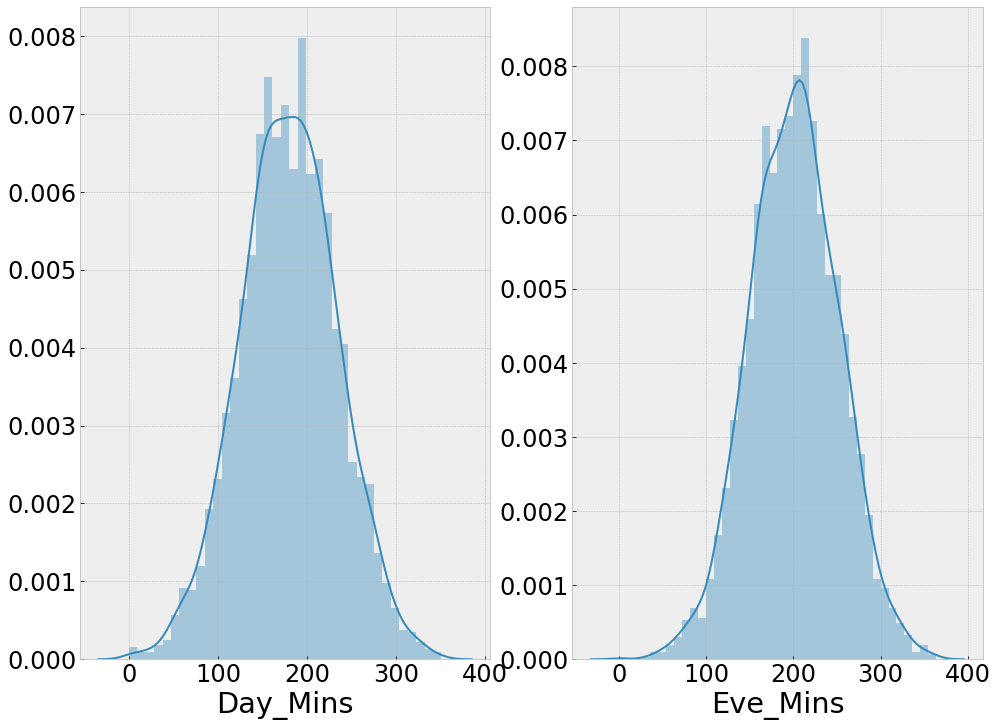

In [32]:

plt.subplot(1,3,1)
sns.distplot(df['Day_Mins'])

plt.subplot(1,3,2)
sns.distplot(df['Eve_Mins'])

# plt.subplot(1,4,3)
# sns.distplot(df['Night_Mins'])

# plt.subplot(1,4,4)
# sns.distplot(df['Intl_Mins'])
# 
#conclusion

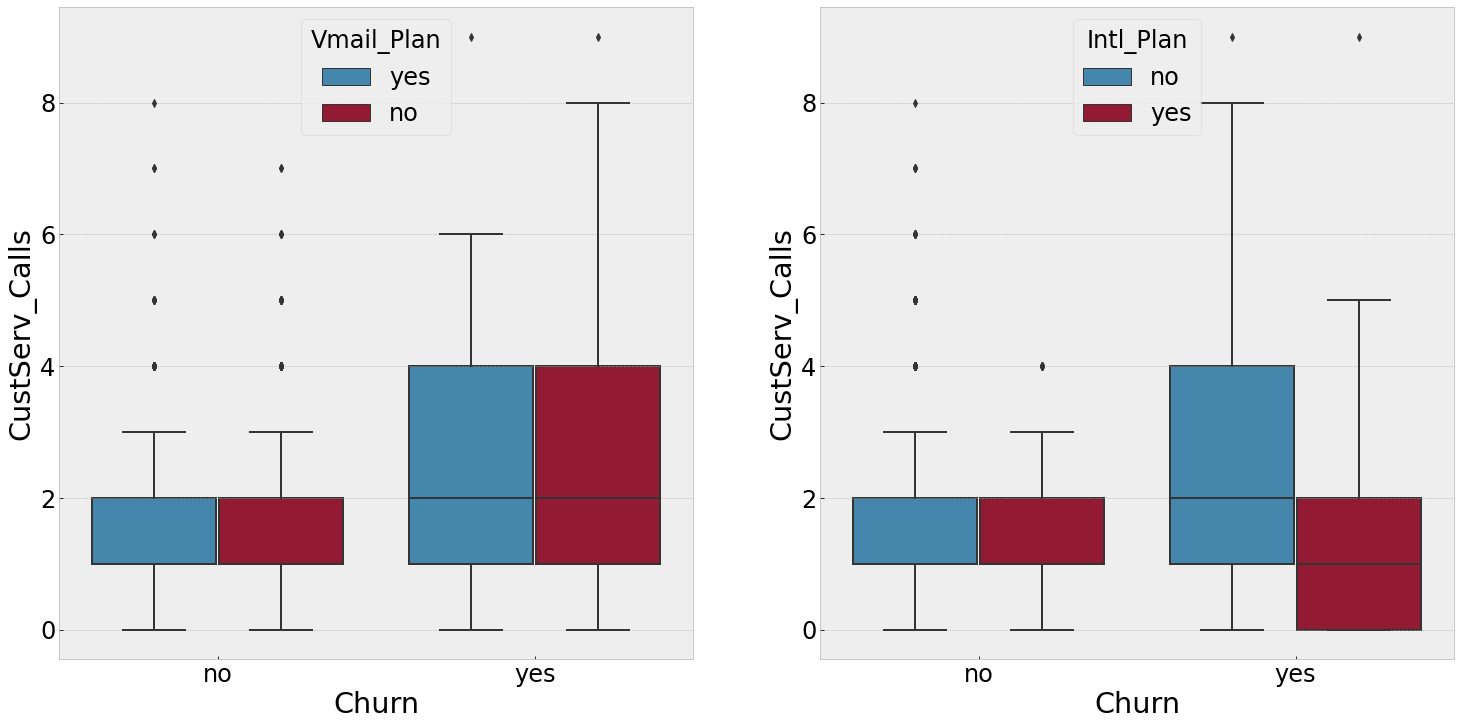

In [33]:
# # 
# # Create the box plot

plt.subplot(1,2,1)
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            # sym = '', # cancel outlier
            hue = "Vmail_Plan",
            data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            # sym = '', # cancel outlier
            hue = "Intl_Plan",
            data = df)


# conclusions


### conclusion :

# Pre-Processing

# Feature Selection / Feature Engineering

In [34]:
df1 = df.copy()

In [35]:
# new feature

# Create the new feature
# df2['Avg_Night_Calls'] = df2['Night_Mins']/df2['Night_Calls']
# # Print the first five rows of 'Avg_Night_Calls'
# print(df2.Avg_Night_Calls.head())

## Encoding vars

In [36]:
# Use labelEncoder or replace

# or replace :

df1['Intl_Plan'] = df1['Intl_Plan'].replace({'no': 0 , 'yes': 1 }) 

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
df1['Vmail_Plan'] = df1['Vmail_Plan'].replace({'no': 0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
df1['Churn'] = df1['Churn'].replace({'no': 0, 'yes':1})


In [37]:

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(df1.State)


In [38]:
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Re-Scaling data

In [39]:
df2 = df1.copy()

In [40]:
df2 = df2.drop(columns=['State', 'Phone'], axis = 1)

In [41]:
df2.head(2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.7,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.7,415


In [42]:
# Use standartization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2['Intl_Calls'] = scaler.fit_transform(df2[['Intl_Calls']] )
df2['Night_Mins'] = scaler.fit_transform(df2[['Night_Mins']])
# Scale telco


In [43]:
df2.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
0,128,25,265.1,197.4,0.866743,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,-0.601195,2.70,415
1,107,26,161.6,195.5,1.058571,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,-0.601195,3.70,415
2,137,0,243.4,121.2,-0.756869,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,0.211534,3.29,415
3,84,0,299.4,61.9,-0.078551,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,1.024263,1.78,408
4,75,0,166.7,148.3,-0.276311,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,-0.601195,2.73,415


In [44]:
df2 = df2.drop(columns = ['Area_Code'], axis = 1)

# Machine Learning Models

In [45]:
df3 = df2.copy()

In [46]:
from sklearn.svm import SVC

svc = SVC()

In [47]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# # Fit the classifier
# clf.fit(telco[features], telco['Churn'])